In [77]:
# mänty = pine
# koivu = birch
# kuusi = spruce
# muu = other

# vanhaa vaivaiskoivua = old soft birch

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

In [89]:
# load data in DataFrame
df = pd.read_excel("LUKE_ripe_berries_observation_dates.xlsx")

# translate some columns
df = df.rename(columns={"marja": "berry", "havainto pvm": "observation_date", "pääpuulaji": "main_tree_type",
         "muu puulaji": "secondary_tree_type", "metsän kehitysluokka": "forest_development_class"})

# drop unneeded columns (for now)
df = df.drop("vaihe", axis=1)
df = df.drop("Välimatka karkeistetun ja todellisen sijainnin välillä", axis=1)

# translate the berry names
df['berry'] = df['berry'].replace(['mustikka'], 'bilberry')
df['berry'] = df['berry'].replace(['puolukka'], 'lingonberry')
df['berry'] = df['berry'].replace(['suomuurain'], 'cloudberry')

# translate main tree type
df['main_tree_type'] = df['main_tree_type'].replace(['koivu'], 'birch')
df['main_tree_type'] = df['main_tree_type'].replace(['kuusi'], 'spruce')
df['main_tree_type'] = df['main_tree_type'].replace(['mänty'], 'pine')
df['main_tree_type'] = df['main_tree_type'].replace(['muu'], 'other')

# helper function to replace "other" with the secondary tree type
def replace_other_tree_type(row):
    if row['main_tree_type'] == "other":
        return row['secondary_tree_type'].lower().replace(" ", "")
    else:
        return row['main_tree_type']


df['main_tree_type'] = df.apply(replace_other_tree_type, axis=1)

# translating the secondary forest types too
df['main_tree_type'] = df['main_tree_type'].replace('suo', 'swamp')
df['main_tree_type'] = df['main_tree_type'].replace('suota', 'swamp')
df['main_tree_type'] = df['main_tree_type'].replace('suopohja', 'swamp')
df['main_tree_type'] = df['main_tree_type'].replace('sekametsä', 'mixed')
df['main_tree_type'] = df['main_tree_type'].replace('seka', 'mixed')
df['main_tree_type'] = df['main_tree_type'].replace('sekapuusto', 'mixed')
df['main_tree_type'] = df['main_tree_type'].replace('lehtikuusi', 'larch')
df['main_tree_type'] = df['main_tree_type'].replace('aukea', 'open')
df['main_tree_type'] = df['main_tree_type'].replace('aukio', 'open')
df['main_tree_type'] = df['main_tree_type'].replace('eipuita', 'open')
df['main_tree_type'] = df['main_tree_type'].replace('puuton', 'open')
df['main_tree_type'] = df['main_tree_type'].replace('vanhaavaivaiskoivua', 'softbirch')
df['main_tree_type'] = df['main_tree_type'].replace('vaivaiskoivikko', 'softbirch')

# now we only have values in English
df['main_tree_type'].value_counts()

df['main_tree_type'] = df['main_tree_type'].astype(str)

df = df.drop("secondary_tree_type", axis=1)

# kasvatusmetsä = plantation_forest
# taimikko = seedling
# varttunut metsä = old_forest
# aukea = clearing

# translate the forest development class
df['forest_development_class'] = df['forest_development_class'].replace(['aukea'], 'clearing')
df['forest_development_class'] = df['forest_development_class'].replace(['taimikko'], 'seedling')
df['forest_development_class'] = df['forest_development_class'].replace(['varttunut metsä'], 'old')
df['forest_development_class'] = df['forest_development_class'].replace(['kasvatusmetsä'], 'plantation')

# split the observation date into year, month, day and also a week number
df['year'] = df['observation_date'].dt.year
df['month'] = df['observation_date'].dt.month
df['day'] = df['observation_date'].dt.day
df['week_number'] = df['observation_date'].dt.isocalendar().week

df['berry'] = df['berry'].astype(str)
df['berry'].dtype


dtype('O')

In [80]:
df.columns

Index(['berry', 'observation_date', 'main_tree_type',
       'forest_development_class', 'x', 'y', 'year', 'month', 'day',
       'week_number'],
      dtype='object')

c:\Users\tuomas.valtanen\data_analytics_2023_course_lectures_git\IntroToDataAnalytics2023LectureNotes\.venv\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\tuomas.valtanen\data_analytics_2023_course_lectures_git\IntroToDataAnalytics2023LectureNotes\.venv\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


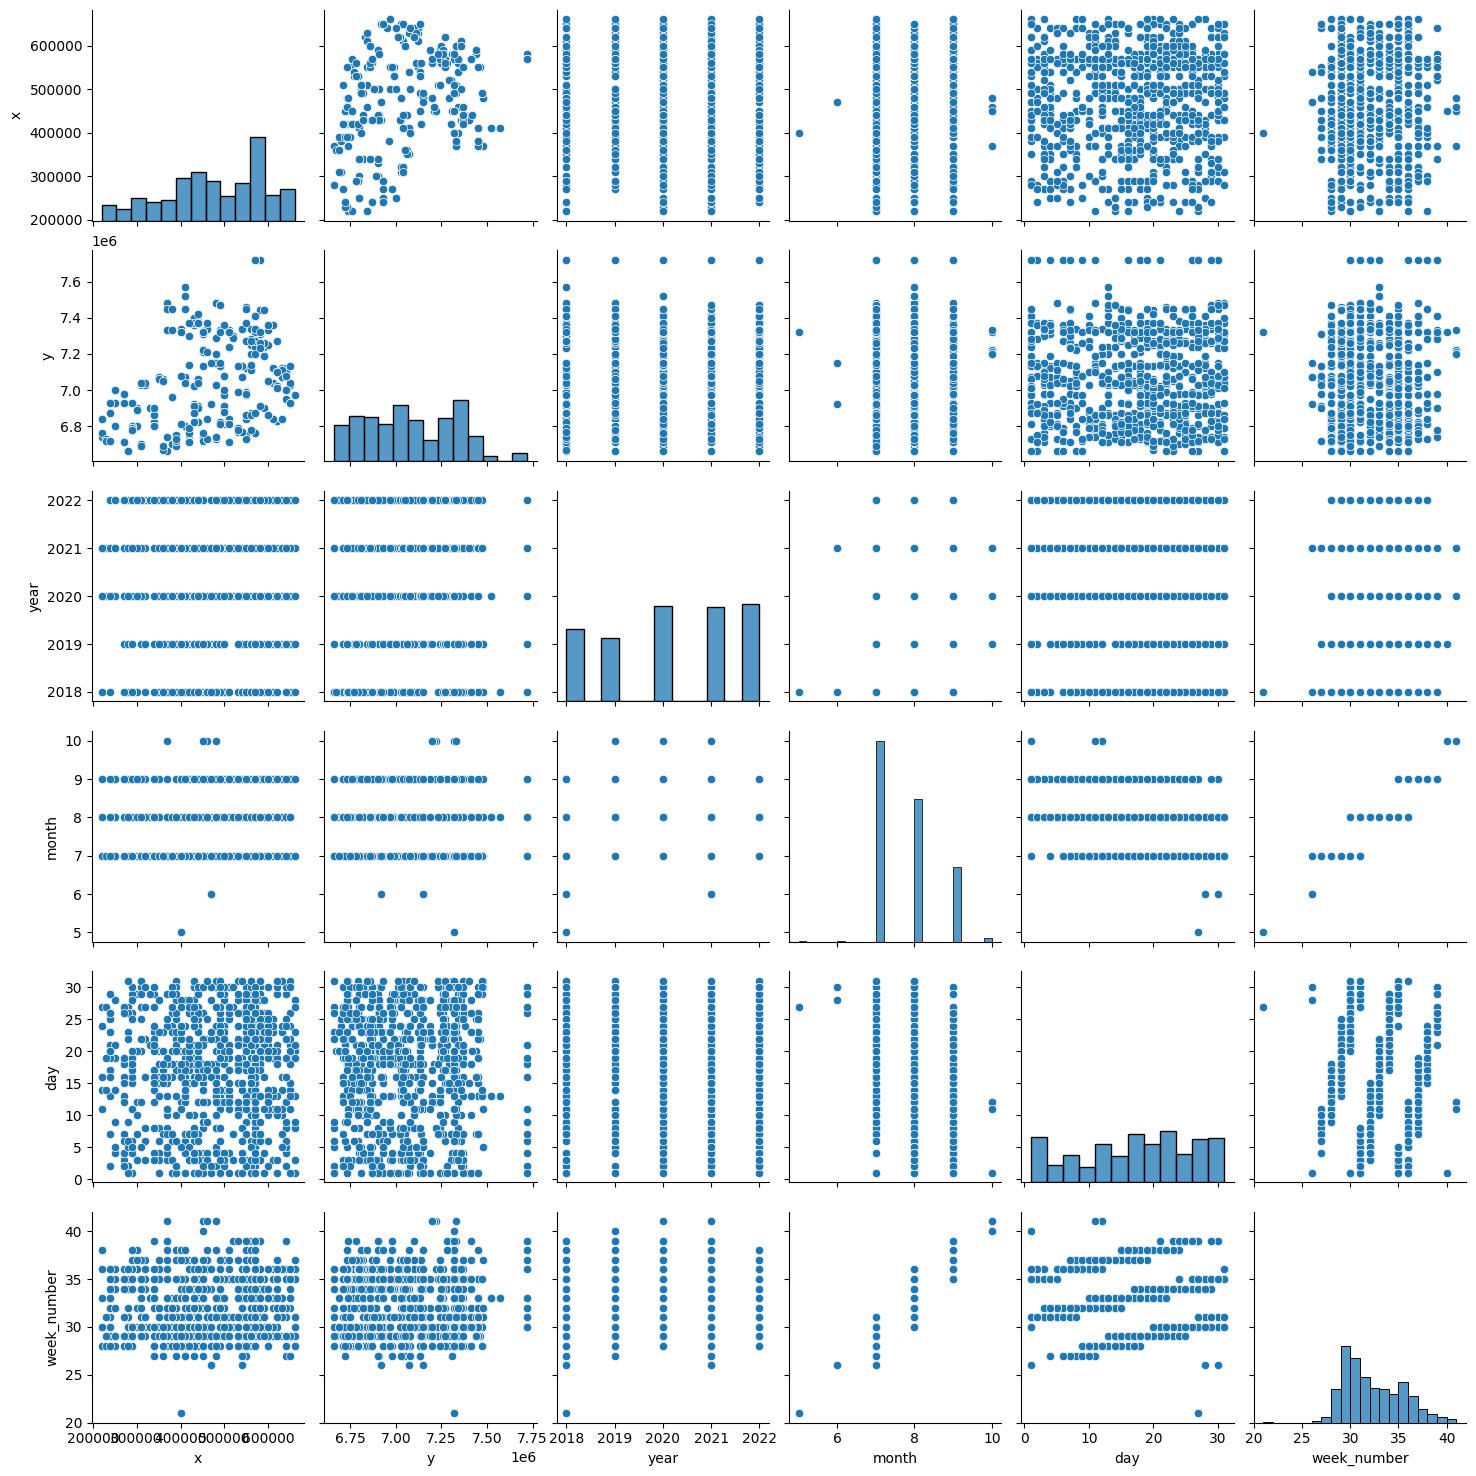

In [81]:
sns.pairplot(df)

ValueError: object arrays are not supported

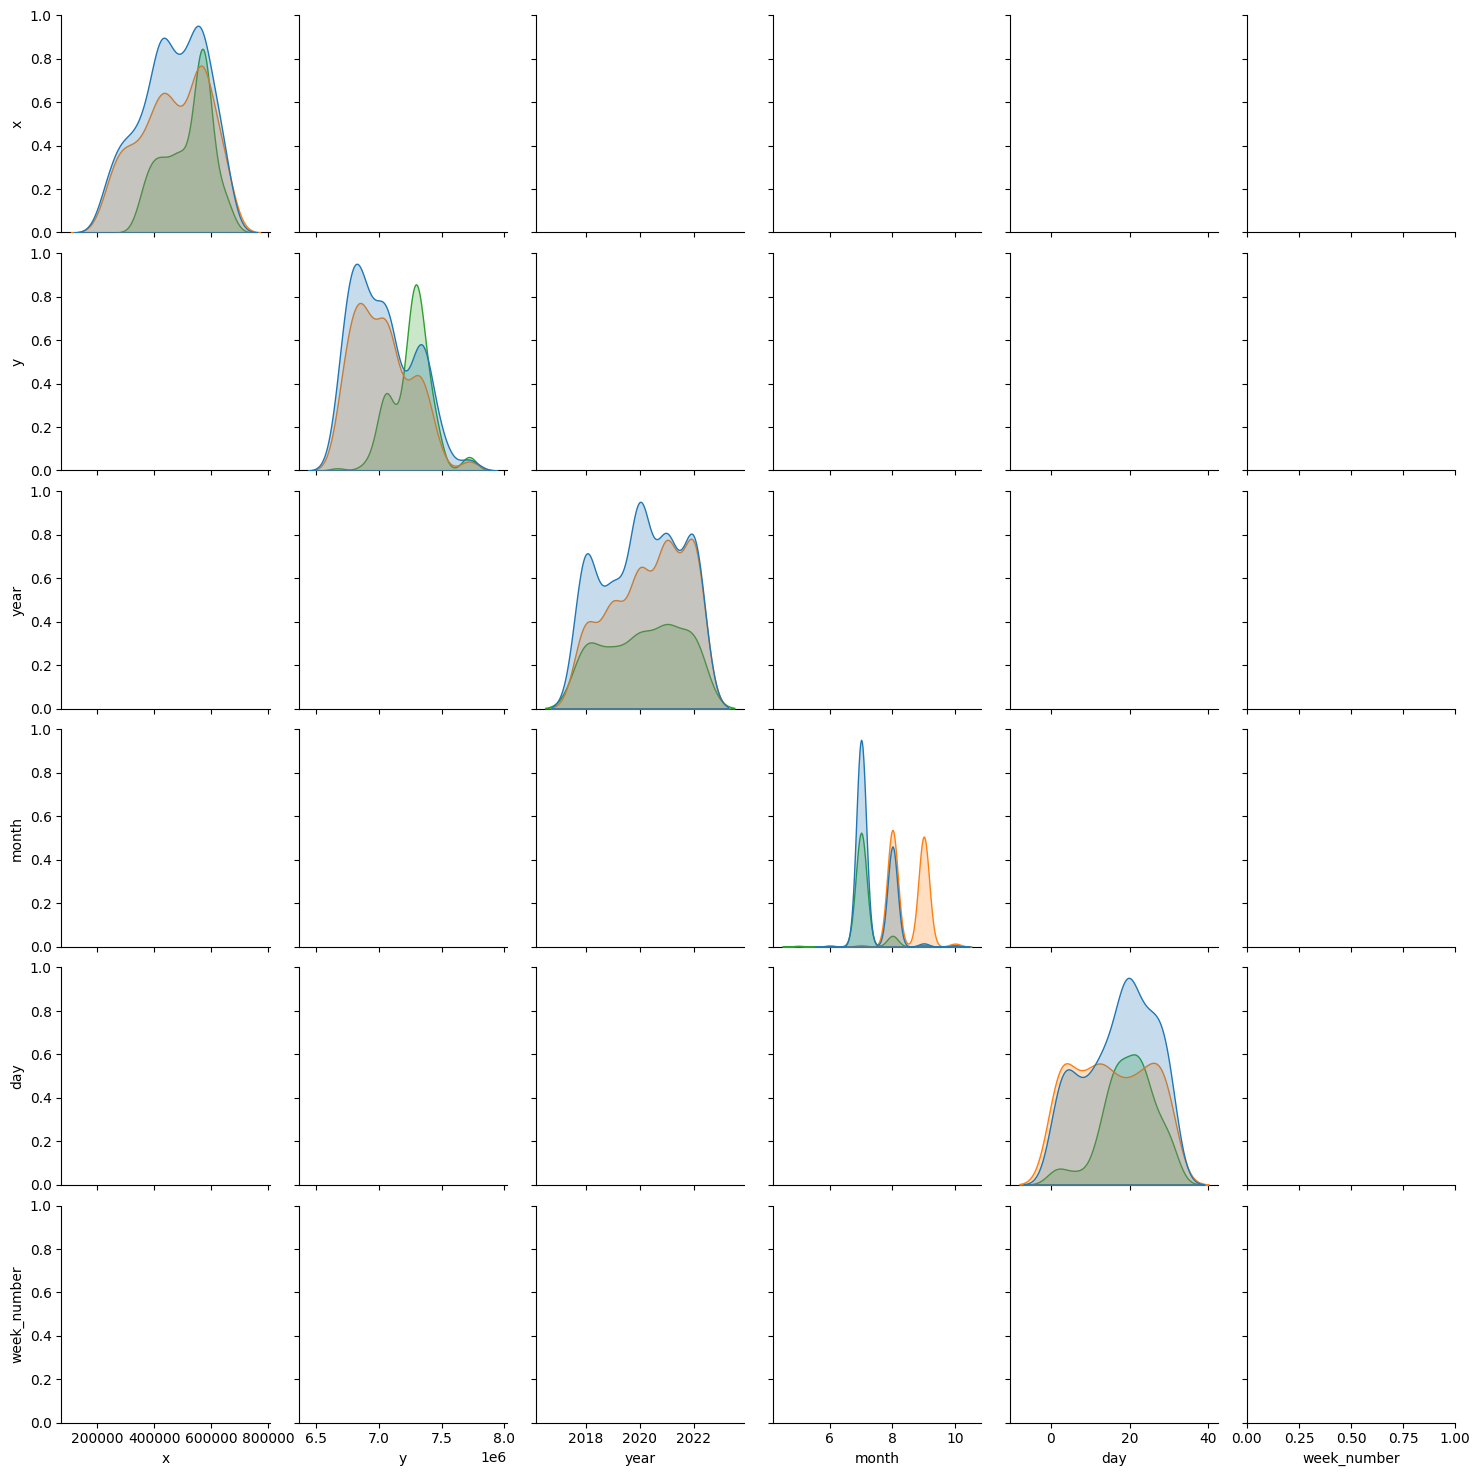

In [87]:
# sns.pairplot(df, hue='berry')